
# Práctica de Laboratorio 3B — Análisis de Series Temporales (Predicción SARIMA)

**Asignatura:** Análisis de Series Temporales  
**Curso:** 2025–2026  

**Autores:**  
Marius Marinescu  
Vanesa Gómez Martínez  
Cristian David Chushig Muzo  
Eva Milara Hernando  

**Afiliación:**  
Universidad Rey Juan Carlos  
Departamento de Teoría de la Señal y Comunicaciones y Sistemas Telemáticos y Computación  

## Objetivo general

El objetivo de esta práctica es aprender a **predecir series temporales mediante modelos SARIMA utilizando Python**.

En particular, se trabajan:

- Cálculo de polinomios predictores F(z) y G(z) para modelos MA, AR y ARMA.
- Obtención del predictor óptimo a varios pasos vista.
- Análisis del error de predicción (estructura MA y varianza).
- Simulación y predicción en un modelo SARIMA conocido.
- Evaluación empírica del error de predicción.
- Predicción en un caso real (AirPassengers) mediante SARIMA y análisis de intervalos de confianza.

El cuaderno combina desarrollo analítico, simulación, visualización e interpretación estadística, y está diseñado como material docente en acceso abierto.

---

## Estructura

1. Polinomios predictores (MA, AR, ARMA y SARIMA)  
2. Predicción en un caso simulado  
3. Predicción en un caso real (AirPassengers, SARIMA)

---



---
# <center> Practica III | Parte B </center>
---


<div align="center">
  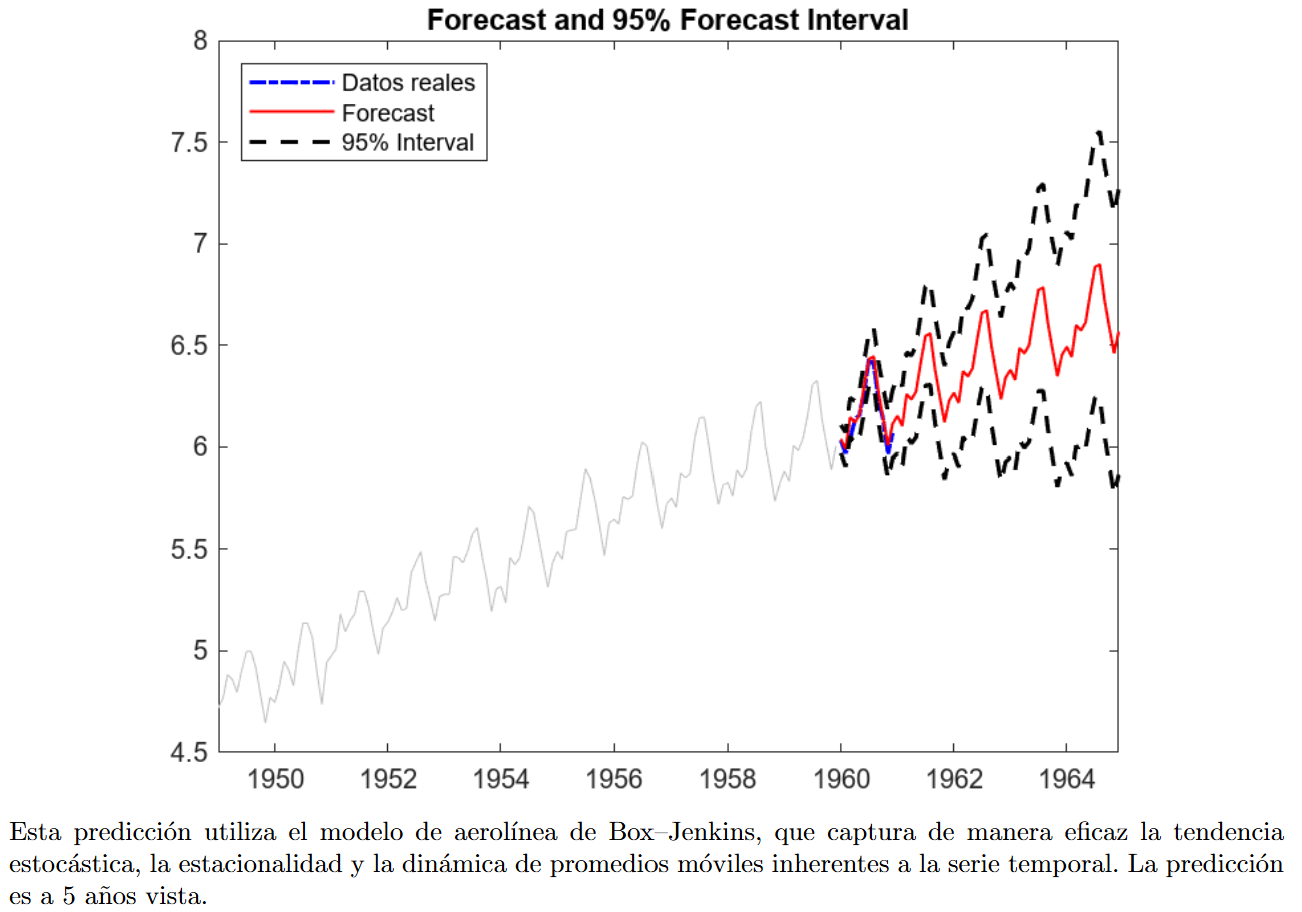
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### Split a cell: Ctrl + M + -
import sys
from pathlib import Path

# IMPORTANT: Replace this with the ACTUAL path to your 'functions' folder in Google Drive.
notebook_dir = Path('/content/drive/MyDrive/Colab Notebooks/AST/Practica III Prediction/')
functions_path = notebook_dir / 'functions'

# Add the subfolder to sys.path
sys.path.insert(0, str(functions_path))

# Now you can import from the module inside the subfolder
# Assuming 'KF_fun.py' exists in your 'functions' subfolder
from Ej_1_functions import predictor_polynomial
###


In [5]:
import numpy as np
from scipy.signal import deconvolve
from scipy.signal import lfilter
import matplotlib.pyplot as plt


## Polinomios Predictores

### Calculo de el Polinomio Predictor de un MA(1), AR(1) y un ARMA(1,1)

In [9]:
print('############')
print('MA(1) process')
print('############ \n')


k = 1
A = np.array([1]) # AR polynomial z^0 y_t  + z^-1 y_t + ...
C = np.array([1, 0.5])


F, G, G_over_C = predictor_polynomial(A, C, k, trunc_order = 5)


print('############')
print('AR(1) process')
print('############ \n')

A = np.array([1, 0.5])
C = np.array([1])


F, G = predictor_polynomial(A, C)



print('############')
print('ARMA(1,1) process')
print('############ \n')


A = np.array([1,  -0.5])
C = np.array([1,  0.5])

F, G = predictor_polynomial(A, C)



############
MA(1) process
############ 

### F(x): ###
1


### G(x): ###
0.5


### G(x)/C(x): ###
0.5 - 0.25*z^{-1} + 0.125*z^{-2} - 0.0625*z^{-3} + 0.03125*z^{-4}


############
AR(1) process
############ 

### F(x): ###
1


### G(x): ###
-0.5


############
ARMA(1,1) process
############ 

### F(x): ###
1


### G(x): ###
1




In [10]:
print('############')
print('SARIMA process | 5 step ahead prediction')
print('############ \n')


# Parameters
s = 12
k = 5

# C = [1 zeros(1,11) -0.3]
C = np.concatenate(([1], np.zeros(11), [-0.3]))

# A = conv([1 -0.2], [1 zeros(1, s-1) -1])
A = np.convolve([1, -0.2], np.concatenate(([1], np.zeros(s-1), [-1])))
F, G, G_over_C = predictor_polynomial(A, C, k, trunc_order = 8)

print('Variance of the prediction error is')
squared_norm = np.linalg.norm(F) ** 2
print(squared_norm)

############
SARIMA process | 5 step ahead prediction
############ 

### F(x): ###
1 + 0.2*z^{-1} + 0.04*z^{-2} + 0.008*z^{-3} + 0.0016*z^{-4}


### G(x): ###
0.00032 + 0.7*z^{-7} - 0.00032*z^{-12}


### G(x)/C(x): ###
0.00032 + 0.7*z^{-7}


Variance of the prediction error is
1.04166656


P1

**¿Usando el polinomio $F(z)$, cuál es la varianza del error de predicción para este modelo SARIMA?**

La varianza de la prediccón (real y teórica) viene dada por los coeficientes del polinomio F(z). En particular, es la norma al cuadrado de los coeficientes, multiplicada por la varianza del ruido. Para el modelo trabajado es: 1.04166656

P2

**Usando el argumento opcional $\texttt{trunc_order()}$ de la función $\texttt{predictor_polynomial()}$ calcula los 5 primeros coeficientes $a_k$ de $\hat{y}_{t+5 \mid t} = \frac{G(z)}{C(z)}y_t = \sum_{k=0}^\infty a_k y_{t-k}$. Razona por qué la predicción depende de $y_{t-7}$.**


$G(z)/C(z): 0.00032 + 0.7z^{-7}$
Al ser un modelo SARIMA con estacionalidad $s=12$, el modelo depende de las observaciones 12 pasos atrás, que para una predicción a 5 pasos vista es equivalente a decir que mira 7 pasos atrás. Esto se puede comprobar despejando $y_{t+4},..., y_{t+1}$ en la expressión SARIMA de $y_{t+5}$ para obtener de que variables, $y_{k}, k \le t$, depende $y_{t+5}$.


## Prediciendo en un caso simulado

### F(x): ###
1 - 0.4*z^{-1} - 0.48*z^{-2} + 0.704*z^{-3}


### G(x): ###
-0.1792 - 0.5632*z^{-1} + 0.6*z^{-10} + z^{-20} + 0.4*z^{-21} + 0.1792*z^{-24} + 0.5632*z^{-25}




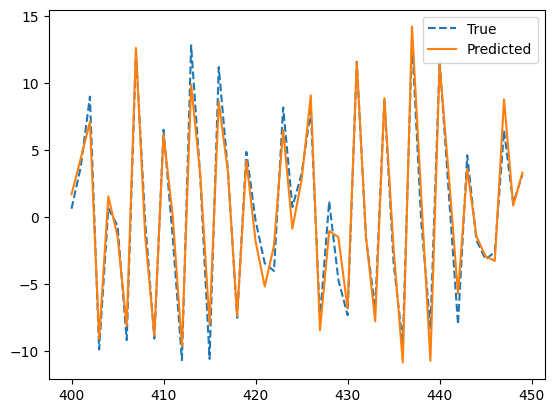

Real and estimated variances
1.886016 1.8276762748988231


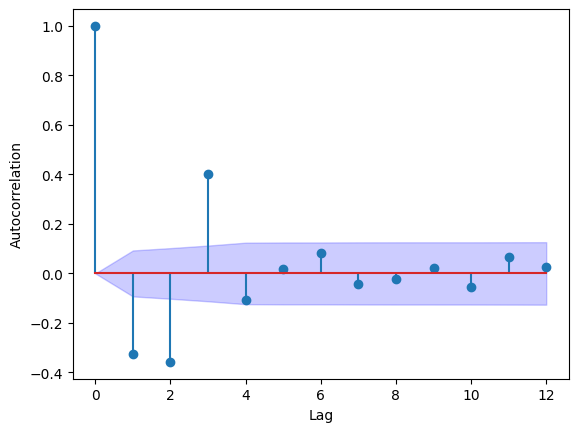

In [11]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

np.random.seed(42)

# Parameters
s = 24
k = 4
n = 450


C = np.concatenate(([1, 0.4], np.zeros(12), [0.6]))
A = np.convolve([1, 0.8, 0.8], np.concatenate(([1], np.zeros(s-1), [-1])))

F, G = predictor_polynomial(A, C, k)


arma = ArmaProcess(A, C)
y = arma.generate_sample(nsample=n)
y_hat = lfilter(G, C, y) # Predecimos usando el polinomio predictor que define un filtro

plt.plot(range(400,450), y[400:450], '--', label="True")
plt.plot(range(400,450), y_hat[400-k:450-k], label="Predicted")
plt.legend(loc='upper right')  # <- here
plt.show()

var_real =  np.linalg.norm(F) ** 2
var_est =   np.linalg.norm(y[k:]-y_hat[:-k]) ** 2 / (n-k)

print('Real and estimated variances')
print(var_real, var_est)


# ACF of errors
lag = 12
lags = np.arange(lag + 1)

acf_vals, confint  = acf(y[k:]-y_hat[:-k], nlags=lag, alpha=0.05 )
plt.stem(lags, acf_vals)
plt.fill_between(
    lags,
    confint[:, 0] - acf_vals,
    confint[:, 1] - acf_vals,
    color='blue',
    alpha=0.2
)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()


P3

**Estima la varianza del error de predicción y compárala con su valor teórico. ¿Es lo que esperas?**

Varianza real y estimada: 1.886 vs 1.827. Por lo que sí, son cercanas.

P4

**Calcula la autocorrelación (muestral) del error de predicción. ¿Es lo que esperas?**

**Pista: recuerda que estructura tiene el error de predicción (teoría).**

Sí, la ACF indica un MA(3), como prevee la teoria. Esta dice que el error de predicción sigue un MA(k-1) con varianza $(1 + f_1^2 + ... + f_k-1^2)\sigma_e^2$, siendo $k$ el horizonte de predicción.

## Prediciendo en un caso real

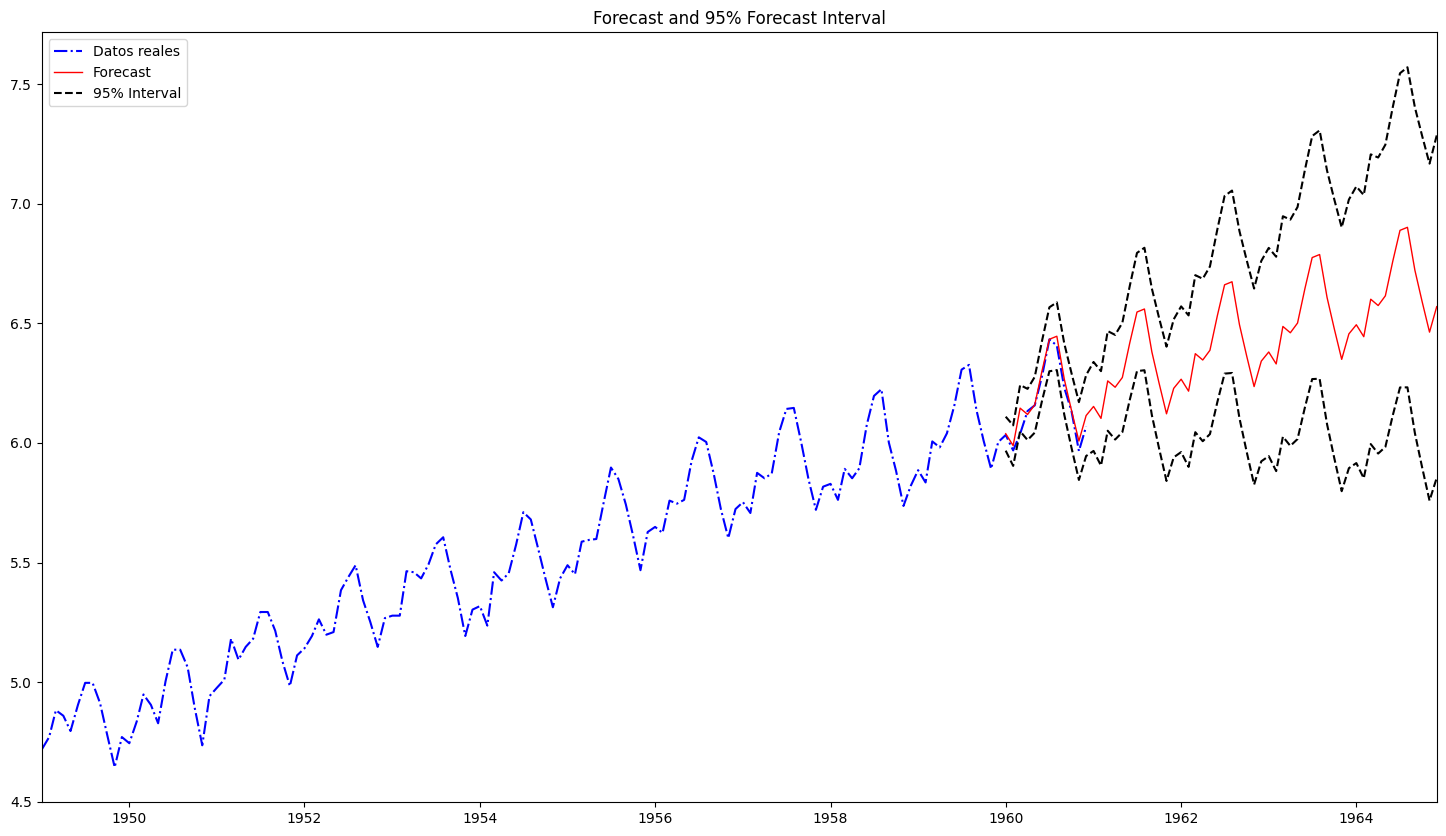

In [12]:
import pandas as pd
import statsmodels.api as sm

# Load the data (assuming the classic AirPassengers dataset)
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

# Create datetime index
data['Time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='MS')

# Log transform
y = np.log(data['value'].to_numpy())

# Split into train and test
y_train = y[:-12]
y_test = y[-12:]

T = len(y_train)

# Define the SARIMA model: ARIMA(0,1,1) x (0,1,1,12) with no constant
model = sm.tsa.SARIMAX(y_train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), trend='n')

# Observation:

# trend='n'— trend in the AirPassengers data is considered
# through its differencing components rather than an explicit trend term.
# this is way trend='n' (no trend) is given
# On the other hand, the diferentiation tackles the seasonal pattern.

# Estimate the model
est_mdl = model.fit(disp=False)

# Forecast 60 steps ahead
forecast = est_mdl.get_forecast(steps=60)
yF = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)
lower = conf_int[:, 0]
upper = conf_int[:, 1]

# Compute yMSE if needed
yMSE = ((upper - yF) / 1.96) ** 2

# Forecast horizons
times = data['Time']
test_times = times.iloc[-12:]
last_train_time = times.iloc[-13]  # Last time of train data (0-based indexing)
fh_start = last_train_time + pd.offsets.MonthBegin(1)
fh = pd.date_range(start=fh_start, periods=60, freq='MS')

# Plotting
plt.figure(figsize=(18, 10))
h0, = plt.plot(times, y, 'b-.', linewidth=1.5, label='Datos reales')
h1, = plt.plot(fh, yF, 'r', linewidth=1, label='Forecast')
h2, = plt.plot(fh, upper, 'k--', linewidth=1.5, label='95% Interval')
plt.plot(fh, lower, 'k--', linewidth=1.5)
plt.xlim([times[0], fh[-1]])
plt.title('Forecast and 95% Forecast Interval')
plt.legend([h0, h1, h2], ['Datos reales', 'Forecast', '95% Interval'], loc='best')
plt.show()

P5

**¿Contiene el intervalo de confianza los valores verdaderos para el año 1961?**

"Sí", excepto para Marzo!

In [18]:
print(y[-12:] - lower[0:12])

[ 0.06545383  0.06468392 -0.01101478  0.1214518   0.11395098  0.10305702
  0.13337193  0.10242328  0.11261271  0.1530781   0.12083993  0.12312492]
